In [1]:
import numpy as np
from UZ_utils import *
from a2_utils import *
import cv2
from matplotlib import pyplot as plt

# Exercise 3

### a

In [76]:
def simple_convolution(signal, kernel):
    N = int(len(kernel) / 2) # kernel of size 2N + 1
    returnSignal = np.zeros(len(signal))
    for i in range(0, len(signal)): # loop through signal
        for j in range(0, 2*N+1): # loop through kenel
            index = i-(j-N)
            if index < 0: # extending edge
                index = 0
            elif index > len(signal)-1:
                index = len(signal)-1
            returnSignal[i] += kernel[j]*signal[index] # weigted sum

    returnSignal[returnSignal < 0] = 0
    returnSignal[returnSignal > 255] = 255

    return returnSignal

In [23]:
def calculateGaussianKernel(sigma):
    N = int(np.ceil(3 * sigma))
    kernel = np.zeros(2 * N + 1)
    for x in range(-N, N):
        kernel[x+N] = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * (sigma**2)))

    return kernel

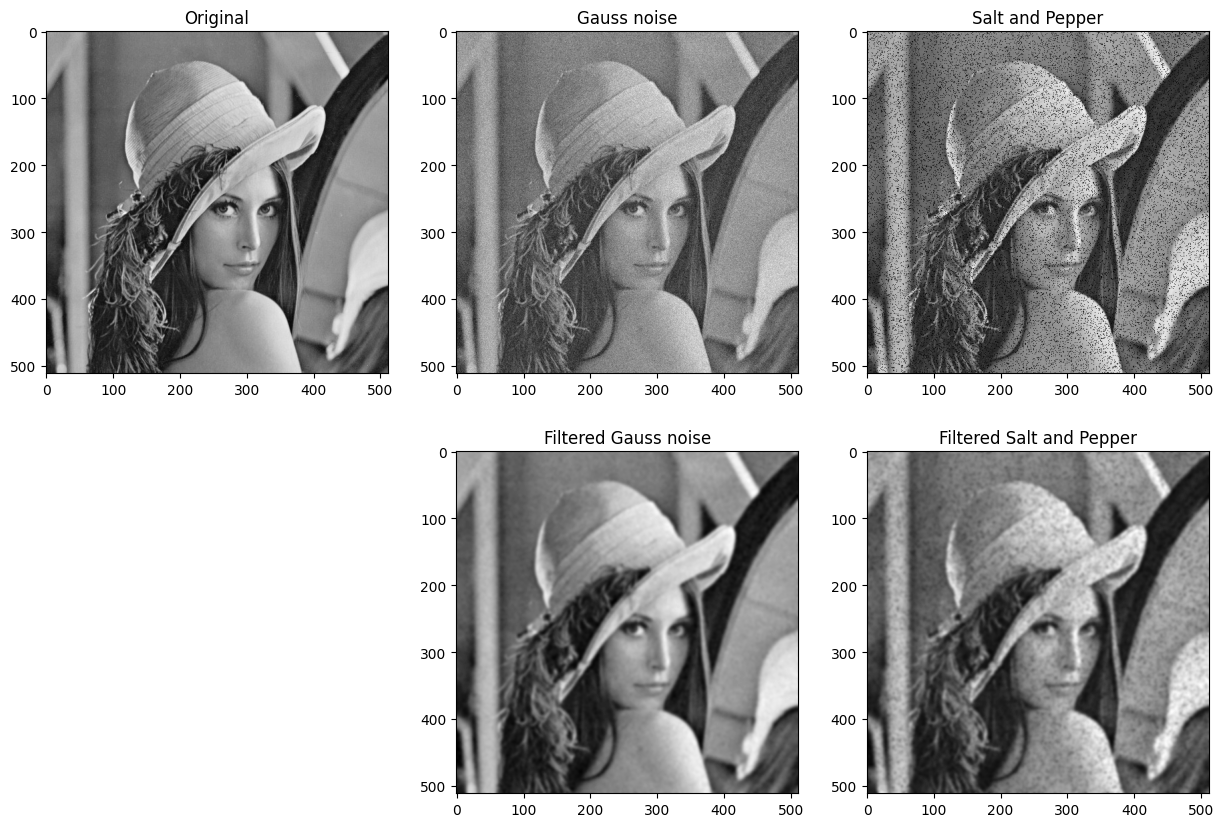

In [35]:
def gaussfilter(img):
    gaussianKernal = calculateGaussianKernel(2)
    for i, row in enumerate(img):
        img[i] = simple_convolution(row, gaussianKernal)
    img = img.T
    for i, row in enumerate(img):
        img[i] = simple_convolution(row, gaussianKernal)
    return img.T

temp = cv2.imread('images/lena.png') # 0-255
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
gaussNoise = gauss_noise(temp, 15)
saltPepperNoise = sp_noise(temp)
filteredGaussNoise= gaussfilter(np.copy(gaussNoise))
filteredSaltPepperNoise= gaussfilter(np.copy(saltPepperNoise))

f = plt.figure(figsize=(15, 10))
f.add_subplot(2, 3, 1)
plt.imshow(temp, cmap="gray")
plt.title("Original")
f.add_subplot(2, 3, 2)
plt.imshow(gaussNoise, cmap="gray")
plt.title("Gauss noise")
f.add_subplot(2, 3, 3)
plt.imshow(saltPepperNoise, cmap="gray")
plt.title("Salt and Pepper")
f.add_subplot(2, 3, 5)
plt.imshow(filteredGaussNoise, cmap="gray")
plt.title("Filtered Gauss noise")
f.add_subplot(2, 3, 6)
plt.imshow(filteredSaltPepperNoise, cmap="gray")
plt.title("Filtered Salt and Pepper")
plt.show()


Question: Which noise is better removed using the Gaussian filter?

Gauss noise

### b

[-0.16666667  1.33333333 -0.16666667]


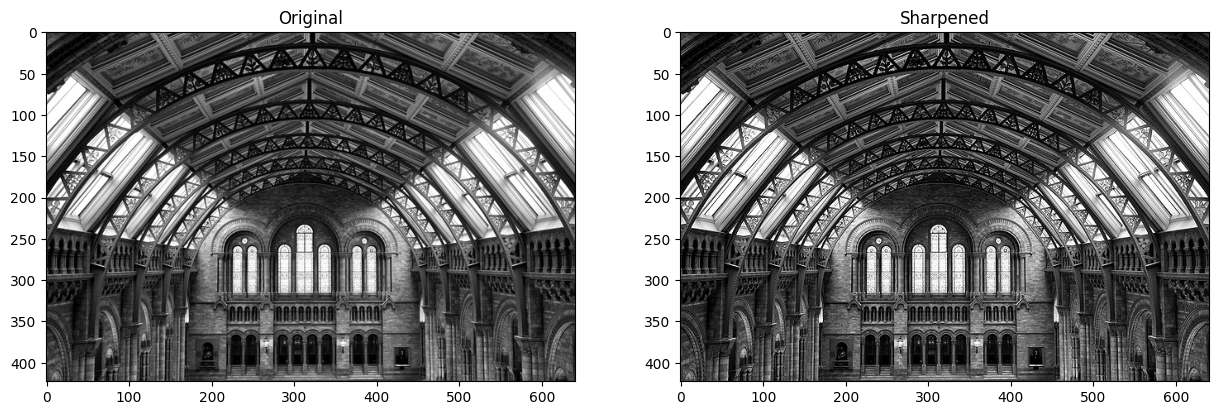

In [86]:
def sharpenfilter(img):
    # gaussianKernal = calculateGaussianKernel(2)
    a = 0.5
    sharpenKernel = (np.array([0, 1 + a, 0]) - np.array([a/3, a/3, a/3]))
    print(sharpenKernel)
    for i, row in enumerate(img):
        img[i] = simple_convolution(row, sharpenKernel)
    img = img.T
    for i, row in enumerate(img):
        img[i] = simple_convolution(row, sharpenKernel)
    return img.T

temp = cv2.imread('images/museum.jpg') # 0-255
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
sharpendedImage = sharpenfilter(np.copy(temp))

f = plt.figure(figsize=(15, 10))
f.add_subplot(1, 2, 1)
plt.imshow(temp, cmap="gray")
plt.title("Original")
f.add_subplot(1, 2, 2)
plt.imshow(sharpendedImage, cmap="gray")
plt.title("Sharpened")
plt.show()

### c

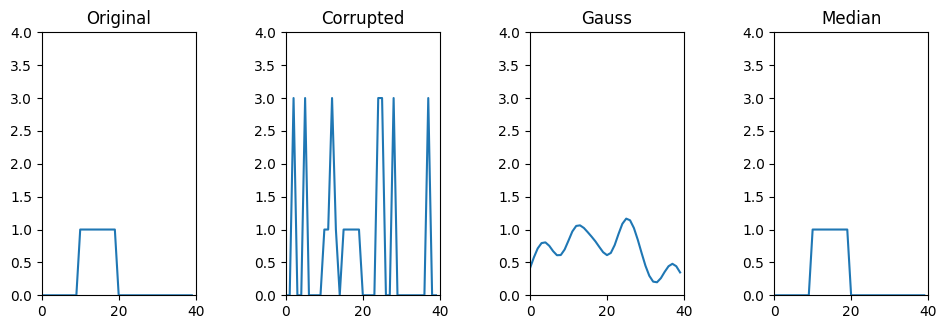

In [223]:
def simple_median(sig, w):
    signal = np.copy(sig)
    N = int(w/2) # assuming w = 2N + 1 is odd
    returnSignal = np.zeros(len(signal))
    for i in range(0, len(signal)):
        clipL = i - N
        clipR = i + N
        if clipL < 0:
            clipL = 0
        if clipR > len(signal) - 1:
            clipR = len(signal) - 1
        returnSignal[i] = np.sort(signal[clipL:clipR+1])[int((clipR-clipL)/2)]

    return returnSignal

temp = np.array(
    [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    ])
corrupted = np.array(
    [
        0, 0, 3, 0, 0, 3, 0, 0, 0, 0,
        1, 1, 3, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 3, 3, 0, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
    ])
gaussSignal = simple_convolution(corrupted, calculateGaussianKernel(2.5))
medianSignal = simple_median(corrupted, 7)
# f = plt.figure(figsize=(12, 4))
f, a = plt.subplots(1, 4)
f.tight_layout()
f.set_figwidth(10)
f.set_figheight(3)
a[0].set_title("Original")
a[0].set(xlim=(0, 40), ylim=(0, 4))
a[0].plot(temp)
a[1].set_title("Corrupted")
a[1].set(xlim=(0, 40), ylim=(0, 4))
a[1].plot(corrupted)
a[2].set_title("Gauss")
a[2].set(xlim=(0, 40), ylim=(0, 4))
a[2].plot(gaussSignal)
a[3].set_title("Median")
a[3].set(xlim=(0, 40), ylim=(0, 4))
a[3].plot(medianSignal)
plt.show()



Question: Which filter performs better at this specific task? In comparison to
Gaussian filter that can be applied multiple times in any order, does the order
matter in case of median filter? What is the name of filters like this?

Median is better at salt and pepper noise. Gauss is better when signal diviates from the average just a bit. Order matters. Nonlinear